In [75]:
print("hello world")

hello world


In [76]:

import numpy as np
import quandl as qnd

from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error


In [77]:

# quandl for financial data
import quandl
# pandas for data manipulation


quandl.ApiConfig.api_key = '8pz6yQyPod3Bxcmj3xiK'

# Retrieve BP data from Quandl Wiki (the free one we should probably be using)
BP = quandl.get('WIKI/BP')
BP.head(10)



,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1977-01-03,76.50,77.62,76.50,77.62,24800.0,0.0,1.0,2.427156,2.462691,2.427156,2.462691,198400.0
1977-01-04,77.62,78.00,76.75,77.00,38600.0,0.0,1.0,2.462691,2.474748,2.435088,2.443020,308800.0
1977-01-05,77.00,77.00,74.50,74.50,35800.0,0.0,1.0,2.443020,2.443020,2.363701,2.363701,286400.0
1977-01-06,74.50,75.50,74.50,75.12,47800.0,0.0,1.0,2.363701,2.395429,2.363701,2.383372,382400.0
1977-01-07,75.12,75.38,74.62,75.12,83400.0,0.0,1.0,2.383372,2.391621,2.367509,2.383372,667200.0
1977-01-10,75.12,75.75,74.50,75.62,26000.0,0.0,1.0,2.383372,2.403361,2.363701,2.399236,208000.0
1977-01-11,75.62,76.38,74.75,75.00,26600.0,0.0,1.0,2.399236,2.423349,2.371633,2.379565,212800.0
1977-01-12,74.75,74.75,73.50,74.25,42000.0,0.0,1.0,2.371633,2.371633,2.331974,2.355769,336000.0
1977-01-13,74.25,76.00,74.12,76.00,54600.0,0.0,1.0,2.355769,2.411293,2.351645,2.411293,436800.0


In [78]:
data = quandl.get_table('WIKI/PRICES',qopts = {'columns':['ticker','date','close']},ticker = 'BP')
data.tail(10)

C:\ProgramData\Anaconda3\lib\site-packages\quandl\get_table.py:38: UserWarning: To request more pages, please set paginate=true in your         quandl.get_table() call. For more information see our documentation:         https://github.com/quandl/quandl-python/blob/master/FOR_ANALYSTS.md#things-to-note
  warnings.warn(Message.WARN_PAGE_LIMIT_EXCEEDED, UserWarning)


,ticker,date,close
None,,,
9990,BP,2016-08-10,33.01
9991,BP,2016-08-11,33.64
9992,BP,2016-08-12,33.74
9993,BP,2016-08-15,33.87
9994,BP,2016-08-16,34.21
9995,BP,2016-08-17,34.20
9996,BP,2016-08-18,34.65
9997,BP,2016-08-19,34.33
9998,BP,2016-08-22,33.96


In [79]:
BP = data.close,data.date



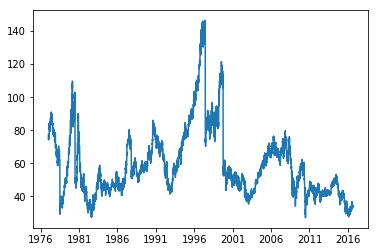

In [80]:
BP[0]
plt.plot(BP[1],BP[0])

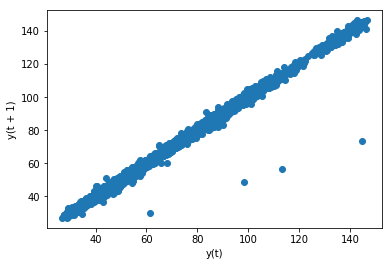

In [81]:
from pandas.plotting import lag_plot
lag_plot(BP[0])

None
0       77.62
1       77.00
2       74.50
3       75.12
4       75.12
5       75.62
6       75.00
7       74.25
8       76.00
9       75.00
10      75.25
11      74.88
12      77.25
13      76.00
14      75.62
15      76.50
16      76.62
17      77.00
18      76.88
19      77.00
20      76.50
21      76.75
22      76.75
23      76.62
24      77.12
25      78.25
26      80.75
27      83.50
28      84.25
29      84.25
        ...  
9970    36.56
9971    36.56
9972    36.56
9973    36.17
9974    36.03
9975    35.96
9976    35.84
9977    35.87
9978    34.90
9979    34.59
9980    34.57
9981    33.99
9982    34.40
9983    33.18
9984    33.45
9985    33.01
9986    33.00
9987    33.15
9988    33.17
9989    33.38
9990    33.01
9991    33.64
9992    33.74
9993    33.87
9994    34.21
9995    34.20
9996    34.65
9997    34.33
9998    33.96
9999    34.13
Name: close, Length: 10000, dtype: float64

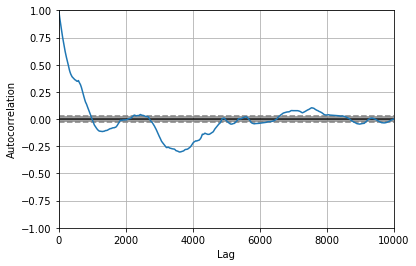

In [82]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(BP[0])
len(BP[0])
X = BP[0]
X

In [102]:
from pandas import Series, datetime

import datetime
BPX = pd.Series(list(BP[0]),index=BP[1])
BPX

date
1977-01-03    77.62
1977-01-04    77.00
1977-01-05    74.50
1977-01-06    75.12
1977-01-07    75.12
1977-01-10    75.62
1977-01-11    75.00
1977-01-12    74.25
1977-01-13    76.00
1977-01-14    75.00
1977-01-17    75.25
1977-01-18    74.88
1977-01-19    77.25
1977-01-20    76.00
1977-01-21    75.62
1977-01-24    76.50
1977-01-25    76.62
1977-01-26    77.00
1977-01-27    76.88
1977-01-28    77.00
1977-01-31    76.50
1977-02-01    76.75
1977-02-02    76.75
1977-02-03    76.62
1977-02-04    77.12
1977-02-07    78.25
1977-02-08    80.75
1977-02-09    83.50
1977-02-10    84.25
1977-02-11    84.25
              ...  
2016-07-13    36.56
2016-07-14    36.56
2016-07-15    36.56
2016-07-18    36.17
2016-07-19    36.03
2016-07-20    35.96
2016-07-21    35.84
2016-07-22    35.87
2016-07-25    34.90
2016-07-26    34.59
2016-07-27    34.57
2016-07-28    33.99
2016-07-29    34.40
2016-08-01    33.18
2016-08-02    33.45
2016-08-03    33.01
2016-08-04    33.00
2016-08-05    33.15
2016-08-08    3

predicted=33.810482, expected=33.870000
predicted=33.833787, expected=34.210000
predicted=34.326965, expected=34.200000
predicted=34.302123, expected=34.650000
predicted=34.745578, expected=34.330000
predicted=34.379713, expected=33.960000
predicted=33.959690, expected=34.130000
Test MSE: 0.094


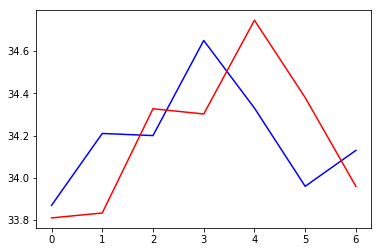

In [131]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
# initiall take some of the later valus as unseen test data:
testno = 7
X = BPX
len(X)
train = X[1:len(X)-testno]
test = X[len(X)-testno:]
Ttrain = T[1:len(T)-testno]
Ttest = T[len(T)-testno:]
#train the regression model from statsmodels
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coefficients = model_fit.params




# now do training data
knowndata = train[len(train)-window:]
knowndata = [knowndata[i] for i in range(len(knowndata))]
                                           
predictions = list()
for t in range(len(test)):
    length = len(knowndata)
    lag = [knowndata[i] for i in range(length-window,length)]
    yhat = coefficients[0]
    for d in range(window):
        yhat += coefficients[d+1]*lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    knowndata.append(obs)
    print('predicted=%f, expected=%f' % (yhat,obs))
error = mean_squared_error(test,predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(list(test),color='blue')
pyplot.plot(predictions, color='red')
pyplot.show()
        
    
                                       
                                       

                                           
                                        
                                           
                                           
                                           
                                           
                                           

In [128]:
test

date
2016-08-15    33.87
2016-08-16    34.21
2016-08-17    34.20
2016-08-18    34.65
2016-08-19    34.33
2016-08-22    33.96
2016-08-23    34.13
dtype: float64

In [129]:
list(test)


[33.87, 34.21, 34.2, 34.65, 34.33, 33.96, 34.13]

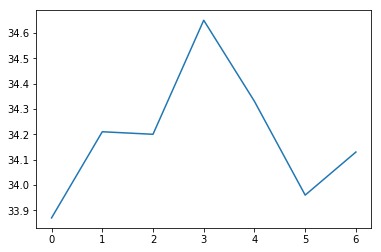

In [130]:
pyplot.plot(list(test
                ))